# Find Gini Coefficients of Gene Expression Data
### by Curtis Schunk 9.20.2022

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
folder='3'

## Values to Choose

In [325]:
max_gini_coef=0.5 #Default=0.5 / a lower number will include more genes

manual_selection_of_sections=0 #Leave at zero if you would like the subsection size to be automatically chosen

## Importing Coordinate Data

#### Make sure that the x-values, y-values, and spot names are being read correctly

In [398]:
coords=pd.read_csv(folder+'/tissue_positions_list_GTs.txt',header=None)

In [399]:
#coords=pd.read_csv('~/Desktop/STARCH_bc/tissue_positions_list.csv',header=None)

In [400]:
#pd.read_csv('5/tissue_positions_list_GTs.txt',header=None)

In [401]:
coords

,0,1,2,3,4,5,6
0,TTATTTCATCCCAAAC-1,1,1,19,2556,4118,1
1,GAGCGCTATGTCAGGC-1,1,0,20,2437,4188,1
2,CTTCGTGCCCGCATCG-1,1,0,22,2438,4326,1
3,GACGGGATGTCTTATG-1,1,1,25,2559,4532,1
4,GGCGAGCATCGAGGAC-1,1,0,26,2440,4601,1
...,...,...,...,...,...,...,...
3634,GCTTCCATGTAACCGC-1,1,74,102,11343,9770,15
3635,TCAATCCGGGAAGTTT-1,1,74,104,11344,9908,15
3636,CTCATAAATGTGTATA-1,1,74,106,11345,10046,15
3637,GGATTGAAGTAGCCTC-1,1,76,102,11583,9769,15


In [402]:
x=np.array(coords[4])
y=np.array(coords[5])
spot_name=np.array(coords[0])

In [403]:
# Make sure that the x-values, y-values, and spot names are being read correctly

## Importing Gene Expression Data

In [404]:
barcodes=pd.read_csv(folder+'/151673_filtered_feature_bc_matrix__barcodes.tsv',header=None)
barcodes=np.array(barcodes[0])

In [405]:
len(barcodes)

3639

In [406]:
array_loc=0
new_x=list()
new_y=list()
delete_this_expression_row=list()
for i in range(len(barcodes)):
    array_loc=np.where(barcodes[i]==spot_name)
    #print(array_loc[0][0])
    if len(np.where(barcodes[i]==spot_name)[0])==0:
        delete_this_expression_row.append(i)
    else:
        new_x.append(x[array_loc[0][0]])
        new_y.append(y[array_loc[0][0]])

#### Make sure the gene names are being read correctly and that the ge_df is in the correct format

In [407]:
import scanpy

In [408]:
ant_ob=scanpy.read_10x_h5(folder+'/15167'+folder+'_filtered_feature_bc_matrix.h5')
_10x_genes=np.array(ant_ob.var.index)
expression_10x=ant_ob.X.toarray()
raw_ge_df=pd.DataFrame(expression_10x,columns=_10x_genes)

/Users/curtis/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [409]:
#raw_ge_df

In [410]:
#raw_ge_df=pd.read_csv('~/Desktop/STARCH_bc/STARCH_bc_expression.csv')

In [411]:
ant_ob

AnnData object with n_obs × n_vars = 3639 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [412]:
# Converting Gene Expression DataFrame to Correct Format
# Should be formatted: Gene Names as Column Names, Spot Names as Row Names

#ge_df=raw_ge_df.set_index('Unnamed: 0')
#ge_df

In [413]:
# Group nonunique genes together
sorted_ge_df=raw_ge_df.groupby(raw_ge_df.columns, axis=1).agg(sum)

In [414]:
genes=sorted_ge_df.columns

### Remove genes with low spot expression

In [415]:
percent_needed=0.005

genestodrop=list()
for i in range(len(genes)):
    zeros=len(np.nonzero(np.array(sorted_ge_df[genes[i]])==0.)[0])
    totallen=len(sorted_ge_df[genes[i]])
    percent=1-(zeros/totallen)
    if percent<percent_needed:
        genestodrop.append(genes[i])
ge_df=sorted_ge_df.drop(genestodrop, axis=1)

In [347]:
size=10

In [422]:
genes=ge_df.columns

In [349]:
#sorted_ge_df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,hsa-mir-1253
0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
#ge_df=sorted_ge_df.drop(delete_this_expression_row).reset_index().drop('index',axis=1)

In [417]:
len(new_x)

3639

In [418]:
ge_df

,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,...,ZSWIM9,ZUP1,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
x=new_x
y=new_y

## Making Rectangular Outline 

In [420]:
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

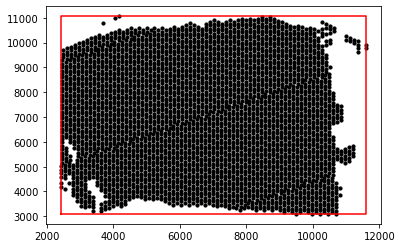

In [421]:
fig,ax = plt.subplots()
ax.scatter(x,y,c='black',s=size);
ax.plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

## Making Subsections

In [423]:
n=len(x)
n_num=math.sqrt(n)

In [424]:
num_of_sections=round(math.sqrt(n_num))

if manual_selection_of_sections!=0:
    num_of_sections=manual_selection_of_sections
    
print('Number of Sections = ',num_of_sections)

Number of Sections =  8


In [425]:
x_len=x_max-x_min
y_len=y_max-y_min
sub_x_size=x_len/num_of_sections
sub_y_size=y_len/num_of_sections

In [426]:
sub_x=list()
sub_y=list()
for i in range(num_of_sections+1):
    sub_x.append(x_min+i*sub_x_size)
    sub_y.append(y_min+i*sub_y_size)

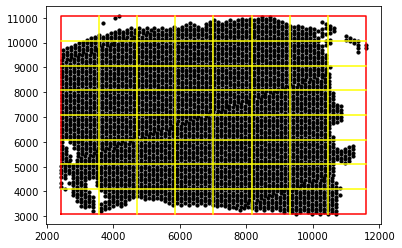

In [427]:
fig,ax = plt.subplots()

ax.scatter(x,y,c='black',s=size);
ax.plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

for i in range(num_of_sections-1):
    i=i+1
    ax.plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax.plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

## Assigning Spots to Subsections

In [428]:
subsection=0
sub_assignment=np.zeros(n)
for i in range(num_of_sections):
    for h in range (num_of_sections):
        subsection+=1
        for spot_num in range(n):
            if x[spot_num]>=sub_x[i] and x[spot_num]<=sub_x[i+1] and y[spot_num]>=sub_y[h] and y[spot_num]<=sub_y[h+1]:
                sub_assignment[spot_num]=subsection

In [429]:
sub_assignment=sub_assignment.astype(int)

In [430]:
color_list=list(sns.color_palette('tab20').as_hex()+sns.color_palette('tab20b').as_hex()+sns.color_palette('tab20c').as_hex())

In [431]:
if max(sub_assignment)>60:
    color_list=color_list*math.ceil(max(sub_assignment))

In [433]:
x=np.array(x)
y=np.array(y)

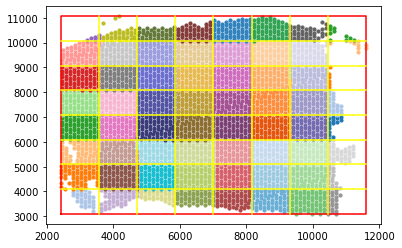

In [434]:
fig,ax = plt.subplots()
group = sub_assignment
color_list=color_list

#Plot Red Outline
ax.plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

#Plot Yellow Subsections
for i in range(num_of_sections-1):
    i=i+1
    ax.plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax.plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(x[ix], y[ix], c = [color_list[g]], label = g,s =size)

## Getting Averages for Each Gene for Each Subsection

In [435]:
ge_df.insert (0, "sub_assignment", sub_assignment)

In [436]:
np.where(np.array(ge_df['sub_assignment'])==7)

(array([  22,   74,  128,  142,  204,  238,  303,  331,  393,  474,  488,
         536,  545,  615,  627,  736,  772,  842,  932,  956,  958, 1006,
        1017, 1027, 1133, 1139, 1283, 1333, 1335, 1388, 1411, 1472, 1563,
        1628, 1702, 1773, 1813, 1841, 1881, 1964, 1969, 2008, 2154, 2244,
        2265, 2290, 2301, 2363, 2410, 2459, 2517, 2539, 2560, 2635, 2639,
        2647, 2740, 2889, 3112, 3133, 3205, 3267, 3287, 3320, 3410, 3434,
        3517, 3572]),)

In [437]:
ge_df.iloc[3314]

sub_assignment    5.0
A1BG              0.0
A1BG-AS1          1.0
A2M               2.0
A2M-AS1           0.0
                 ... 
ZXDB              0.0
ZXDC              0.0
ZYG11B            1.0
ZYX               0.0
ZZEF1             0.0
Name: 3314, Length: 15229, dtype: float64

In [438]:
sub_array=np.zeros([num_of_sections**2,ge_df.shape[1]])

for i in range(num_of_sections**2):
    i=i+1
    working_sub=ge_df.loc[ge_df['sub_assignment']==i].mean()
    working_sub=np.array(working_sub)
    sub_array[i-1]=working_sub

In [439]:
sub_df=pd.DataFrame(sub_array)

In [440]:
column_titles=list(genes)
column_titles.insert(0,'sub_assignment')
sub_df=sub_df.set_axis([column_titles], axis=1, inplace=False)

In [441]:
#sub_df

In [442]:
#sub_ass_7

In [443]:
#sub_df=sub_df.drop(7)

## Finding Gini Coefficient

In [444]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

# function via: https://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/

In [445]:
gini_list=list()
for i in range(len(genes)):
    working_gene=np.array(sub_df[genes[i]])
    gini_obj=gini(working_gene)
    gini_list.append(gini_obj)

In [446]:
ginis=np.array(gini_list)

In [447]:
gini_df=pd.DataFrame([genes,ginis[:,0]]).transpose().set_axis(['Genes','Gini'], axis=1, inplace=False)

In [448]:
sorted_gini_df=gini_df.sort_values(by=['Gini'],ascending=False)

In [449]:
sorted_cut_gini_df=sorted_gini_df[sorted_gini_df.Gini > max_gini_coef]

In [450]:
sorted_cut_gini_df

,Genes,Gini
3548,CRISP3,0.910998
511,AC100793.4,0.883867
6741,KCNJ2-AS1,0.880298
8879,NOTUM,0.878743
2046,BHMT,0.872653
...,...,...
11699,SGCD,0.500295
5965,HCN3,0.500193
12477,SPTSSB,0.50015
14310,VWC2,0.500095


## Export List of Spatially Varying Genes

In [451]:
# Including Gini Values
sorted_cut_gini_df.to_csv(folder+'/spatially_varying_genes.csv')

# Only Gene Names
#pd.DataFrame(list(sorted_cut_gini_df['Genes'])).to_csv('NamesOnly_spatially_varying_genes.csv',index=None)

## Expression Map of Top 4 Spatially Varying Genes

In [452]:
#Making Heatmap

num_of_colors=100
pre_color_list=np.zeros([num_of_colors,3])
for i in range(num_of_colors):
    pre_color_list[i]=[1-i/num_of_colors,1-i/num_of_colors,1-i/num_of_colors]
    
for i in range(num_of_colors):
    if i==0:
        htmp_color_list=[(pre_color_list[i][0],pre_color_list[i][1],pre_color_list[i][2])]
    else:
        htmp_color_list+=[(pre_color_list[i][0],pre_color_list[i][1],pre_color_list[i][2])]

In [453]:
startingpoint=0 #set to 0 for top 4

In [454]:
name_1=sorted_cut_gini_df.reset_index().iloc[0+startingpoint][1]
name_2=sorted_cut_gini_df.reset_index().iloc[1+startingpoint][1]
name_3=sorted_cut_gini_df.reset_index().iloc[2+startingpoint][1]
name_4=sorted_cut_gini_df.reset_index().iloc[3+startingpoint][1]

In [455]:
expression_for_gene1=np.array(ge_df[name_1])
expression_for_gene2=np.array(ge_df[name_2])
expression_for_gene3=np.array(ge_df[name_3])
expression_for_gene4=np.array(ge_df[name_4])

In [456]:
heatmap_group_1=((expression_for_gene1/max(expression_for_gene1))*(num_of_colors-1)).astype(int)
heatmap_group_2=((expression_for_gene2/max(expression_for_gene2))*(num_of_colors-1)).astype(int)
heatmap_group_3=((expression_for_gene3/max(expression_for_gene3))*(num_of_colors-1)).astype(int)
heatmap_group_4=((expression_for_gene4/max(expression_for_gene4))*(num_of_colors-1)).astype(int)

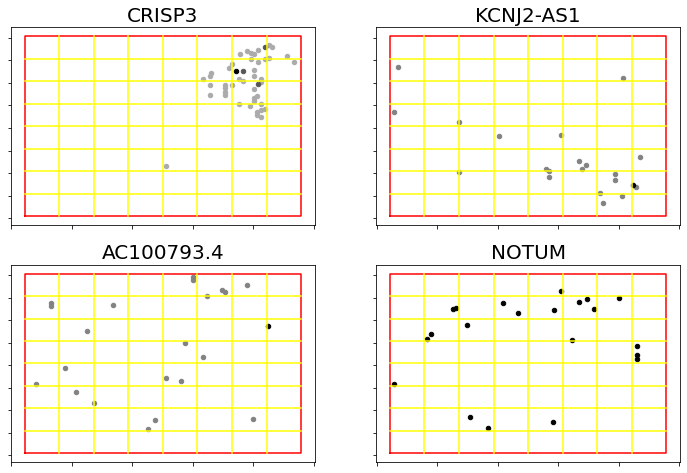

In [457]:
fig,ax = plt.subplots(2,2,figsize=(12, 8))
color_list=htmp_color_list

### Gene 1

group=heatmap_group_1
#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax[0, 0].scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
    
ax[0, 0].set_title(name_1,size=20)
ax[0, 0].xaxis.set_ticklabels([])
ax[0, 0].yaxis.set_ticklabels([])
    
### Gene 2

group=heatmap_group_2
#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax[1, 0].scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
    
ax[1, 0].set_title(name_2,size=20)
ax[1, 0].xaxis.set_ticklabels([])
ax[1, 0].yaxis.set_ticklabels([])
    
### Gene 3

group=heatmap_group_3
#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax[0, 1].scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
    
ax[0, 1].set_title(name_3,size=20)
ax[0, 1].xaxis.set_ticklabels([])
ax[0, 1].yaxis.set_ticklabels([])
      
### Gene 4

group=heatmap_group_4
#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax[1, 1].scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
    
ax[1, 1].set_title(name_4,size=20)
ax[1, 1].xaxis.set_ticklabels([])
ax[1, 1].yaxis.set_ticklabels([])
    
#Plot Red Outline
ax[0, 0].plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');
ax[1, 0].plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');
ax[0, 1].plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');
ax[1, 1].plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

#Plot Yellow Subsections
for i in range(num_of_sections-1):
    i=i+1
    ax[0, 0].plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax[0, 0].plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')
    ax[1, 0].plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax[1, 0].plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')
    ax[0, 1].plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax[0, 1].plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')
    ax[1, 1].plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax[1, 1].plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

## Single Gene Lookup

In [384]:
gene_looking_at='DPPA4'

#### Plotting Gene

In [385]:
expression_for_gene_looking_at=np.array(ge_df[gene_looking_at])

In [386]:
heatmap_groups=((expression_for_gene_looking_at/max(expression_for_gene_looking_at))*(num_of_colors-1)).astype(int)

In [390]:
x=np.array(x)
y=x=np.array(y)

Genes       DPPA4
Gini     0.984375
Name: 14926, dtype: object


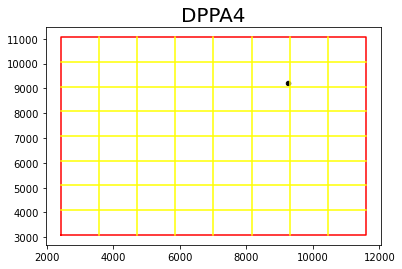

In [391]:
fig,ax = plt.subplots()
group=heatmap_groups
color_list=htmp_color_list

#Plot Spots... Different Subgroup = Different Color
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
    
ax.set_title(gene_looking_at,size=20)
    
#Plot Red Outline
ax.plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

#Plot Yellow Subsections
for i in range(num_of_sections-1):
    i=i+1
    ax.plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax.plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

#Print Gini for Single Gene
print(gini_df.iloc[np.where(genes==gene_looking_at)[0][0]])

### Looking at Lots of Genes

In [161]:
def plot_heatmap(genenum,ge_df,subplotnum):

    name_1=sorted_cut_gini_df.reset_index().iloc[genenum][1]

    expression_for_gene1=np.array(ge_df[name_1])

    heatmap_group_1=((expression_for_gene1/max(expression_for_gene1))*(num_of_colors-1)).astype(int)

### Gene 1

    group=heatmap_group_1
#Plot Spots... Different Subgroup = Different Color
    for g in np.unique(group):
        ix = np.where(group == g)
        ax[subplotnum].scatter(x[ix], y[ix], c = [color_list[g]], label = g, s = 20)
        
    gininum=str(round(sorted_cut_gini_df.reset_index().iloc[0][2],2))   
    plottitle=name_1+' - g='+gininum
    
    ax[subplotnum].set_title(plottitle,size=10)
    ax[subplotnum].xaxis.set_ticklabels([])
    ax[subplotnum].yaxis.set_ticklabels([])
    
#Plot Red Outline
    ax[subplotnum].plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

#Plot Yellow Subsections
    for i in range(num_of_sections-1):
        i=i+1
        ax[subplotnum].plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
        ax[subplotnum].plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

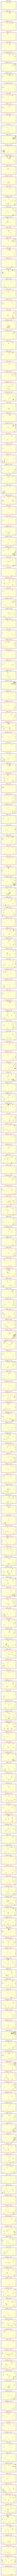

In [162]:
numofplot=250

fig,ax = plt.subplots(numofplot,figsize=(4.5, 3*numofplot))
color_list=htmp_color_list

for i in range(numofplot):
    plot_heatmap(i,ge_df,i)
    
    string=str(i+1)+'/'+str(numofplot)+' ('+str(round((i+1)/numofplot*100))+'%)'
    print(string,end='\r')

### Plotting Gold Standard

In [186]:
goldstandard=pd.read_csv('ZhouLab/Starch/5.27.22_dataset/gold_metadata.tsv',sep='\t')
#goldstandard

In [198]:
gs_array=np.array(goldstandard['annot_type'])

In [199]:
gs_data=pd.read_csv('ZhouLab/Starch/5.27.22_dataset/GoldStand_coords_plt.txt')
loc_array=np.array(gs_data.drop(['Unnamed: 0'], axis=1))

In [200]:
#loc_array

In [201]:
#gs_array=array[:,1]

In [202]:
unique=list(np.unique(gs_array))
gs_array_int=np.zeros(len(gs_array))
for i in range(len(unique)):
    for n in range(len(gs_array)):
        if unique[i]==gs_array[n]:
            gs_array_int[n]=i
gs_array_int=gs_array_int.astype(int)

In [203]:
gs_array

array(['Surrounding tumor', 'Invasive', 'Healthy', ..., 'Invasive',
       'Surrounding tumor', 'Surrounding tumor'], dtype=object)

In [204]:
gs_array_int

array([2, 1, 0, ..., 1, 2, 2])

In [205]:
cluster_num=np.max(gs_array_int)+1

vals=list()
for i in range(cluster_num):
    find=np.where(gs_array_int==i)
    index=find[0][0]
    vals.append(gs_array[index])

In [206]:
vals

['Healthy', 'Invasive', 'Surrounding tumor', 'Tumor']

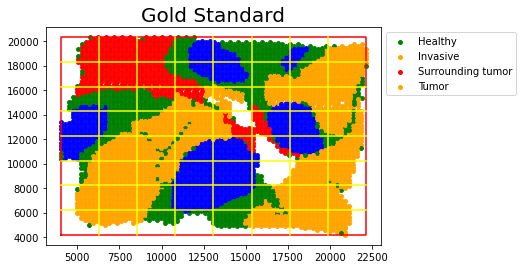

In [207]:
fig,ax=plt.subplots()
colors=['red','orange','green','blue']
#colors=['brown','red','chocolate','darkorange','tan','floralwhite','gold','olive','yellow','yellowgreen','lawngreen','aquamarine','teal','lightskyblue','dodgerblue','navy','blueviolet','purple','deeppink','pink'] #list of colors to use
labels=list() #make empty array for list of labels
#labels_int=np.zeros(array.shape[0])

for i in range(array.shape[0]):
    sample=loc_array[i]
    label=sample[1] #label for each sample
    label_int=gs_array_int[i]
    loc=sample[0].split('x')
    coord=[float(loc[0]),float(loc[1])] #coordinates for each sample
    
    color=colors[label_int] #which color to used based on label
    ax.scatter(coord[0],coord[1],c=color, label=label, s=15) #plot
    labels.append(label) #add label to list of labels
    
#labels_int=labels.astype(int)
#vals=range(labels_int.min(),labels_int.max()+1) #find min and max label values to make legend of labels
ax.legend(vals,bbox_to_anchor=(1, 1))

ax.set_title('Gold Standard',size=20)
    
#Plot Red Outline
ax.plot([x_min,x_min,x_max,x_max,x_min],[y_min,y_max,y_max,y_min,y_min],c='red');

#Plot Yellow Subsections
for i in range(num_of_sections-1):
    i=i+1
    ax.plot([sub_x[i],sub_x[i]],[y_min,y_max],c='yellow')
    ax.plot([x_min,x_max],[sub_y[i],sub_y[i]],c='yellow')

#ax.legend(vals,loc=0)

leg = ax.get_legend()